<a href="https://colab.research.google.com/github/shicong621/Colab/blob/main/PA4_Shicong_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming Assignment 4: 

The files are zipped and uploaded in Piazza Resource .

**Part 1: Twitter Sentiment Classification with sklearn**

The file: sentiment-train.csv contains 60k tweets annotated by their sentiments (0: negative, 1: positive), which is a sample
of a very large sentiment corpus that has been weakly annotated based on the emojis contained in the tweets. File sentiment-test.csv contains the testing data organized in the same format as the training data file.

**Task 1 & 2:**
Using [sklearn](https://scikit-learn.org/stable/index.html) (you could search for the relevant functions to see how to use them in your code), 

1. Train a Multinomial Naive Bayes classifier (with default parameters) to predict sentiment on the
training data, featurizing the data using CountVectorizer (also in sklearn). Use the default parameters of CountVectorizer
and max features = 1000 (to limit the number of bag-of-word features to only the top 1k words based on frequency across
the corpus). You should learn more about CountVectorizer parameters and usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Report the accuracy of the trained
classifier on the test set. 

2. Use CountVectorizer with binary counts (set binary flag = True), with other parameters same as before. Using
these features, train MultinomialNB classifier with default parameters and report the accuracy of the trained classifier
on the test set. Does using binary counts as features improve the classification accuracy?

**Hint:** we strongly recommend to use [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) for reading .csv files and manipulating them in this assignment. 

**Task 1:**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

def loadDataFromCSV(filePath):
    df = pd.read_csv(filePath)
    y = df['sentiment']
    x = df['text']
    return df, x, y

def constructTokenCountMatrix(corpus, target):
    vectorizer = CountVectorizer(stop_words = 'english', max_features= 1000)
    vectorizer.fit(corpus)
    countMax = vectorizer.transform(target)
    return countMax

def trainMultinomialNaiveBayes(x, y):
    clf = MultinomialNB()
    clf.fit(x, y)
    return clf

In [ ]:
# load data from csv
df, xTrain, yTrain = loadDataFromCSV('sentiment-train.csv')
_, xTest, yTest = loadDataFromCSV('sentiment-test.csv')

# construct token count matrix
xTrainCountMax = constructTokenCountMatrix(xTrain, xTrain)
xTestCountMax = constructTokenCountMatrix(xTrain, xTest)

# train mnb model with count matrix
mnb = trainMultinomialNaiveBayes(xTrainCountMax, yTrain)

# compute the mean accuracy score
acc = mnb.score(xTestCountMax, yTest)
print('Multinomial NaiveBayes: The accuracy of the trained classifier is', acc)

Multinomial NaiveBayes: The accuracy of the trained classifier is 0.7827298050139275


**Task 2:**

In [ ]:
def constructTokenCountMatrixBinary(corpus, target):
    vectorizer_bn = CountVectorizer(stop_words = 'english', max_features= 1000, binary = True)
    vectorizer_bn.fit(corpus)
    countMax_bn = vectorizer_bn.transform(target)
    return countMax_bn

In [ ]:
# construct token count matrix
xTrainCountMax_bn = constructTokenCountMatrixBinary(xTrain, xTrain)
xTestCountMax_bn = constructTokenCountMatrixBinary(xTrain, xTest)

# train mnb model with count matrix
mnb_bn = trainMultinomialNaiveBayes(xTrainCountMax_bn, yTrain)

# compute the mean accuracy score
acc_bn = mnb_bn.score(xTestCountMat_bn, yTest)
print('Multinomial NaiveBayes with binary counts: The accuracy of the trained classifier is', acc_bn)

Multinomial NaiveBayes with binary counts: The accuracy of the trained classifier is 0.7743732590529248


**Tasks 3 & 4:**
3. Using sklearn, train a logistic regression classifier on your training data, using CountVectorizer to featurize your
data (with the same parameters as in task 1). Report the accuracy of the trained classifier on the test set.

4. Train a logistic regression classifier as before, using binary CountVectorizer to featurize your data. Report the
accuracy of the trained classifier on the test set.

**Task 3:**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def trainLogistRegression(x, y):
    clf = LogisticRegression()
    clf.fit(x, y)
    return clf

In [ ]:
# train logistic regression model with count matrix
lr = trainLogistRegression(xTrainCountMax, yTrain)
# compute the mean accuracy score
acc_lr = lr.score(xTestCountMat, yTest)
print('Logistic Regression: The accuracy of the trained classifier is', acc_lr)

Logistic Regression: The accuracy of the trained classifier is 0.766016713091922


**Task 4:**

In [ ]:
# train logistic regression model with count matrix
lr_bn = trainLogistRegression(xTrainCountMax_bn, yTrain)
# compute the mean accuracy score
acc_lr_bn = lr_bn.score(xTestCountMat_bn, yTest)
print('Logistic Regression with binary counts: The accuracy of the trained classifier is', acc_lr_bn)

Logistic Regression with binary counts: The accuracy of the trained classifier is 0.7688022284122563


**Task 5:** After performing the above experiments, which feature extractor and statistical model combination is good for your
dataset? Note that this step is called model selection. Read online about the following terminology “model selection”
and “development set” a.k.a. “validation set” and describe if it is okay to do model selection on the test set.

**Your answer here:**
In this assignment, I find Multinomial Naive Bayes classifier model has better performance than Logistic Regression model. 
We cannot do model selection on the test set since the test data should be unseen, which should be the final step in evaluating model's performance.

**Task 6 & 7:**
6. Conduct 10-fold cross validation experiments on your training data: training a Multinomial NB classifier
with CountVectorizer and different max features (= 1000, 2000, 3000, or 4000) with and without binary counts.
Report the average accuracies of these different max features and binary/not binary across folds.

7. Select the combination of max features value and binary/not binary count choice that has the highest average
accuracy in your cross-validation experiments and train a Multinomial NB classifier on your whole training data
using this parameter to featurize your data. Report the accuracy of this trained classifier on the test set.

**Hint:** Consider Stratified K-Folds for task 6.

**Task 6:**

In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import csv
import numpy as np

In [102]:
train_text = []
train_label = []
with open('/sentiment-train.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for line in reader:
        label, text = line
        train_text.append(text)
        train_label.append(label)

In [103]:
test_text = []
test_label = []
with open('/sentiment-test.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for line in reader:
        label, text = line
        test_text.append(text)
        test_label.append(label)

In [ ]:
def trans_data(train_text, test_text, Vectorizer, max_features):
    vectorizer = Vectorizer(stop_words="english", max_features = max_features)
    vectorizer.fit(train_text)
    train_data = vectorizer.transform(train_text)
    test_data = vectorizer.transform(test_text)
    return train_data,test_data

In [ ]:
# without binary
def kfold_valid(train_text, test_text, max_features=1000):
    train_data,test_data = trans_data(train_text, test_text, CountVectorizer, max_features=max_features)
    cv = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    scores = cross_val_score(MultinomialNB(), train_data, train_label, scoring='accuracy', cv=cv)
    print('Accuracy with {} features, binary feature is False: {}'.format(max_features, np.mean(scores)))

In [ ]:
kfold_valid(train_text, test_text, max_features=1000)
kfold_valid(train_text, test_text, max_features=2000)
kfold_valid(train_text, test_text, max_features=3000)
kfold_valid(train_text, test_text, max_features=4000)

Accuracy with 1000 features, binary feature is False: 0.71875
Accuracy with 2000 features, binary feature is False: 0.73075
Accuracy with 3000 features, binary feature is False: 0.7338833333333333
Accuracy with 4000 features, binary feature is False: 0.7353666666666667


In [ ]:
# with binary
def kfold_valid_bn(train_text, test_text, max_features=1000):
    train_data,test_data = trans_data(train_text, test_text, CountVectorizer, max_features=max_features)
    cv = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
    scores = cross_val_score(MultinomialNB(), train_data, train_label, scoring='accuracy', cv=cv)
    print('Accuracy with {} features, binary feature is True: {}'.format(max_features, np.mean(scores)))

In [ ]:
kfold_valid_bn(train_text, test_text, max_features=1000)
kfold_valid_bn(train_text, test_text, max_features=2000)
kfold_valid_bn(train_text, test_text, max_features=3000)
kfold_valid_bn(train_text, test_text, max_features=4000)

Accuracy with 1000 features, binary feature is True: 0.7228166666666667
Accuracy with 2000 features, binary feature is True: 0.7366833333333334
Accuracy with 3000 features, binary feature is True: 0.7414666666666666
Accuracy with 4000 features, binary feature is True: 0.7439499999999999


**Task 7:**

In [ ]:
def trans_data_bn(train_text, test_text, Vectorizer, max_features):
    vectorizer = Vectorizer(stop_words="english", max_features = max_features, binary = True)
    vectorizer.fit(train_text)
    train_data = vectorizer.transform(train_text)
    test_data = vectorizer.transform(test_text)
    return train_data,test_data

In [ ]:
def predict_sentiment_bn(train_text, test_text, Classifier, Vectorizer, max_features=1000):
    train_data,test_data = trans_data_bn(train_text, test_text, Vectorizer, max_features=max_features)
    clf = Classifier()
    clf.fit(train_data, train_label)
    score = clf.score(test_data, test_label)
    print("Classifier: {}\nBest max feature: {}\nscore: {}".format(Classifier.__name__, max_features, score))
    return score

In [ ]:
score = predict_sentiment_bn(train_text, test_text, MultinomialNB, CountVectorizer, max_features=4000)

Classifier: MultinomialNB
Best max feature: 4000
score: 0.7715877437325905


**Task 8 & 9 & 10:**

8. Use [gensim](https://radimrehurek.com/gensim/models/word2vec.html) library to learn 300-dimensional word2vec representations from the tokenized tweets (you can use
Spacy for tokenizing tweets) in your training data (you can use default parameters).
9. Given the learned word2vec representations, construct a vector representation of each tweet as the average of all
the word vectors in the tweet. Ignore words that do not have vector representations – since by default gensim
word2vec model only learns vector representations for words that appear at least 5 times across the train set.
10. Train a logistic regression classifier using the above vector representation of tweets as your features. Report
the accuracy of the trained classifier on the test set. Does dense feature representation improve the accuracy of
your logistic regression classifier?

**Task 8:**

In [28]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import spacy
nlp = spacy.load('en_core_web_sm')
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
def tokenize(text_list, remove_stop = False):
    token_list = []
    for line in text_list:
        sent = nltk.word_tokenize(line)
        res = []
        for word in sent:
            if remove_stop and word in nlp.Defaults.stop_words:
                continue
            res.append(word.lower())
        token_list.append(res)
    return token_list

**Task 9:**

In [ ]:
def trans2Vec(data, model):
    vectors = []
    for sent in data:
        word_vectors = []
        for word in sent:
            if word in model.wv:
                word_vectors.append(model.wv[word])
        if len(word_vectors) > 0:
            vector = np.mean(word_vectors, axis = 0)
        else:
            vector = np.zeros(300)
        vectors.append(vector)
    return vectors

**Task 10:**

In [ ]:
def predict_accuracy(train_text, test_text, model, remove_stop):
    train_data = tokenize(train_text, remove_stop=remove_stop)
    test_data = tokenize(test_text, remove_stop=remove_stop)
    train_vectors = trans2Vec(train_data, model)
    test_vectors = trans2Vec(test_data, model)
    clf = LogisticRegression(max_iter = 1000)
    clf.fit(train_vectors, train_label)
    score = clf.score(test_vectors, test_label)
    if not remove_stop:
        print("the Accuracy of the trained classifier is {}".format(score))
    else:
        print("Remove stop words, Word2Vec LR score: {}".format(score))


In [104]:
train_data = tokenize(train_text)
model = Word2Vec(sentences = train_data, size = 300, window = 5, min_count = 5)
model.save("word2vec.model")

In [ ]:
predict_accuracy(train_text, test_text, model, remove_stop=False)

the Accuracy of the trained classifier is 0.6629526462395543


In [ ]:
predict_accuracy(train_text, test_text, model, remove_stop=True)

Remove stop words, Word2Vec LR score: 0.6713091922005571


In [ ]:
# Your results should look similar to this: ("the Accuracy of the trained classifier is: ..." below)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


the Accuracy of the trained classifier is: 65.74%
the Accuracy of the trained classifier is: 69.64%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Part 2: PCA Analysis of Shakepear's Plays.**

The file: will play text.csv contains lines from William Shakespeare’s plays. The second column of the file contains the name of
the play, while the fifth and the sixth contain the name of the character who spoke and what they spoke, respectively. Tokenize
and lower case each line in will play text.csv using spacy. The file vocab.txt lists the words in the vocabulary. play_categories.csv stores the categories of the Shakepear's plays.

Task 11 & 12 & 13:
11. Create a term-document matrix where each row represents a word in the vocabulary and each column represents
a play. Each entry in this matrix represents the number of times a particular word (defined by the row) occurs in a
particular play (defined by the column). Use CountVectorizer in sklearn to create the matrix, using the file vocab.txt as
input for the vocabulary parameter. From your term-document matrix, use PCA in sklearn to create a 2-dimensional
representation of each play. Visualize these representations to see which plays are most similar to each other. Include the
visualization in your answer sheet. You can follow the tutorial [here](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/) to create the visualization (look at the "PCA" part).

12. What plays are similar to each other? Do they match the grouping of Shakespeare’s plays into comedies, histories,
and tragedies here?

  **Your answer here:**

13. Create another term-document matrix where each row represents a word in the vocabulary and each column
represents a play, but with TFIDF counts (using TFIDFVectorizer in sklearn and vocab.txt for vocabulary). Use PCA
again on these TFIDF term-document matrix and visualize the plays. Include the visualization in your answer sheet.

**Hints:** the PCA function in sklearn doesn't work for sparse inputs, try 'TruncatedSVD' instead. 



**Task 11:**

In [2]:
import csv

In [4]:
text_list = []
with open('/will_play_text.csv') as f:
    reader = csv.reader(f,delimiter=';')
    for line in reader:
        text_list.append(line)

In [5]:
play_genres = []
with open('/play_genres.csv') as f:
    contents = f.readlines()[1:] 
    reader = csv.reader(contents,delimiter=';')
    for line in reader:
        play_genres.append(line)
print("Number of plays: {}".format(len(play_genres)))

Number of plays: 36


In [6]:
vocab = []
with open('/vocab.txt') as f:
    for line in f:
        vocab.append(line.strip())

In [7]:

word_to_index = {word: i for i, word in enumerate(vocab)}
index_to_word = [word for i, word in enumerate(word_to_index)]

In [8]:
play_to_text = {}
for data in text_list:
    name = data[1]
    talk = data[5]
    for word in play_genres:
        genres = word[0]
        if name in genres:
            if name not in play_to_text:
                play_to_text[name] = []
                play_to_text[name].append(talk)
            else:
                play_to_text[name].append(talk)

In [9]:
play_text = []
play_names = []
for k, v in play_to_text.items():
    play_text.append(' '.join(v))
    play_names.append(k)

**Task 12: CountVectorizer PCA**

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vectorizer = CountVectorizer(stop_words="english", vocabulary = vocab)
vectorizer.fit(play_text)
term_doc = vectorizer.transform(play_text)
print(term_doc.shape)

(36, 22602)


In [12]:
pca = PCA(n_components=2)
term_doc_pca = pca.fit_transform(term_doc.toarray())

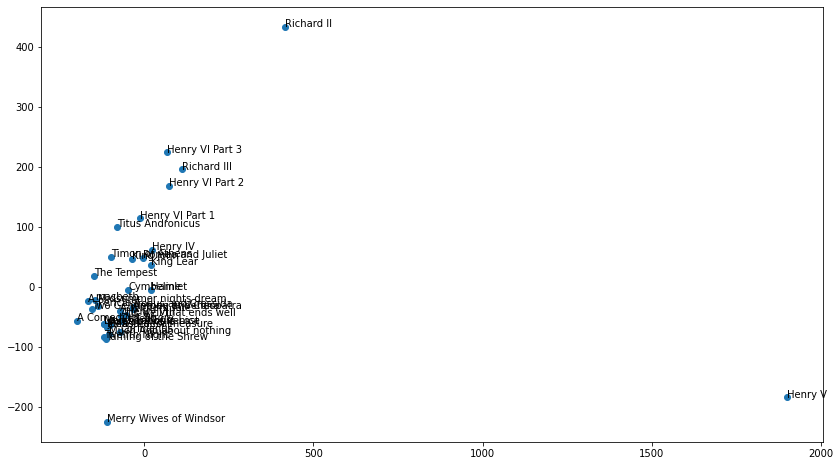

In [13]:
plt.figure(figsize=(14,8))
plt.scatter(term_doc_pca[:, 0], term_doc_pca[:, 1])
for i, name in enumerate(play_names):
    plt.annotate(name, xy=(term_doc_pca[i, 0], term_doc_pca[i, 1]))
plt.savefig("plays_countVec.png")
plt.show()

**Task 13: TfidVectorizer PCA**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer(stop_words = "english", vocabulary = vocab)
vectorizer.fit(play_text)
term_doc = vectorizer.transform(play_text)
print(term_doc.shape)

(36, 22602)


In [16]:
pca = PCA(n_components=2)
term_doc_pca = pca.fit_transform(term_doc.toarray())

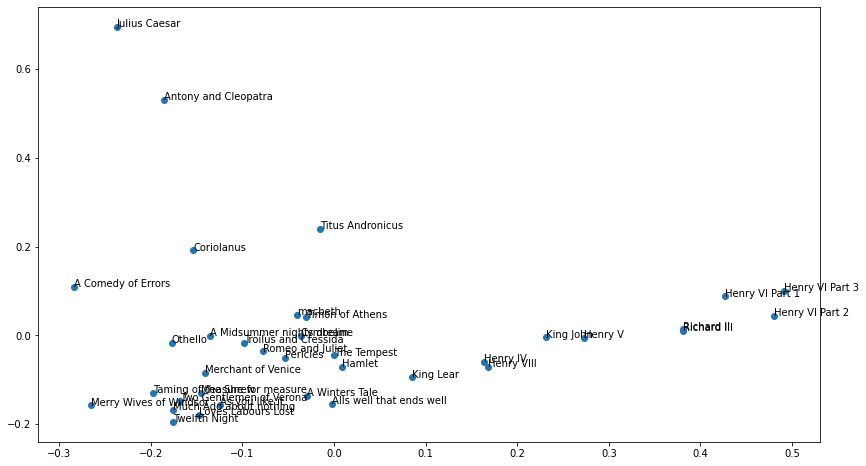

In [17]:
plt.figure(figsize=(14,8))
plt.scatter(term_doc_pca[:, 0], term_doc_pca[:, 1])
for i, name in enumerate(play_names):
    plt.annotate(name, xy=(term_doc_pca[i, 0], term_doc_pca[i, 1]))
plt.savefig("plays_tfidfVec.png")
plt.show()

**Task 14 & 15:**
14. Create a word-word matrix where each row (and each column) represents a word in the vocabulary (vocab.txt).
Each entry in this matrix represents the number of times a particular word (defined by the row) co-occurs with another
word (defined by the column) in a sentence (i.e., line in will play text.csv). Using the row word vectors, create a representation
of a play as the average of all the word vectors in the play. Use these vector representations of plays to compute
average pairwise cosine-similarity between plays that are comedies (do not include self-similarities). You can use the
grouping of plays in here.

15. Using vector representations of plays computed in task 14, compute average pairwise cosine-similarity between
plays that are histories, and between plays that are tragedies (do not include self-similarities).

Hint: 
[How to calculate a word-word-co-occurence-matrix with sklearn](https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn).

**Task 14: Word-word Matrix**

In [18]:
line_text = []
for i, data in enumerate(text_list[:]):
    talk = data[5].lower()
    line_text.append(talk)

In [19]:
vectorizer = CountVectorizer(stop_words="english", vocabulary = vocab)
term_doc = vectorizer.fit_transform(line_text)
print(term_doc.shape)

(111396, 22602)


In [20]:
word_word = (term_doc.T * term_doc)
word_word.setdiag(0)
word_word_matrix = word_word.toarray()
print(word_word_matrix.shape)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


(22602, 22602)


In [21]:
word_to_vector = {}
for i in range(word_word_matrix.shape[0]):
    word_to_vector[index_to_word[i]] = word_word_matrix[i]

**Task 15: Plays Cosine Similarity**

In [33]:
import numpy as np

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations

In [ ]:
import numpy as np
play_vectors = {}
#print(word_to_vector)
for keys, values in play_to_text.items():
    #print(keys)
    #print(values)
    word_vectors = []
    word_vectors = np.array(word_vectors)
    #print(values)
    values = ' '.join(values)
    cnt = 0;
    for word in values.lower().split():
    #    fg = 1
    #    break
        if word in word_to_index:
            cnt += 1
            if len(word_vectors) == 0:
                word_vectors = word_to_vector[word]
            else:
                word_vectors = word_vectors + word_to_vector[word]
    #print(cnt)
    play_vectors[keys] = word_vectors / cnt
    print(play_vectors[keys])

In [23]:
def cos_sim(a, b):
    x = np.sum(np.array(a) * np.array(b), axis=0)
    y = np.linalg.norm(a) * np.linalg.norm(b)
    return x / y

In [65]:
play_genres_split = []
for sub_list in play_genres:
    for item in sub_list:
        play_genres_split.append(item.split(','))
        
comedies = []
histories = []
tragedies = []

for sub_lst in play_genres_split :
    if ' comedies' in sub_lst:
        comedies.append(sub_lst[0])
    elif ' histories' in sub_lst:
        histories.append(sub_lst[0])
    elif ' tragedies' in sub_lst:
        tragedies.append(sub_lst[0])

In [71]:
comedies_paris = list(combinations(comedies, 2))
comedies_sim = []
for (a, b) in comedies_paris:
    v1 = play_vectors[a]
    v2 = play_vectors[b]
    comedies_sim.append(cos_sim(v1, v2))
print("play as word average  comedies {}".format(np.mean(comedies_sim)))

play as word average  comedies 0.9897228892040232


In [72]:
histories_paris = list(combinations(histories, 2))
histories_sim = []
for (a, b) in histories_paris:
    v1 = play_vectors[a]
    v2 = play_vectors[b]
    histories_sim.append(cos_sim(v1, v2))
print("play as word average  histories {}".format(np.mean(histories_sim)))

play as word average  histories 0.9826865350568943


In [73]:
tragedies_paris = list(combinations(tragedies, 2))
tragedies_sim = []
for (a, b) in tragedies_paris:
    v1 = play_vectors[a]
    v2 = play_vectors[b]
    tragedies_sim.append(cos_sim(v1, v2))
print("play as word average  tragedies {}".format(np.mean(tragedies_sim)))

play as word average  tragedies 0.9925193923005564


**Task 16:**

16. Use gensim to learn 100-dimensional word2vec representation of the words in the play (you can use default
parameters but with min count=1 so you can learn vector representations of all the words in your data i.e., no need to
use vocab.txt in this question). Use the learned word2vec representation to construct vector representations of plays as
the average of all the word vectors in the play. Visualize these representations to see which plays are most similar to each other.

**Hint:** from now, since the inputs are no longer sparse, use the PCA function instead of the 'truncatedSVD' one.

In [32]:
train_data = tokenize(play_text, remove_stop=False)
model = Word2Vec(sentences=train_data, size=100, window=5, min_count=1)

In [44]:
play_vectors_word2vec = {}
for name, text in play_to_text.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    play_vectors_word2vec[name] = np.mean(word_vectors, axis=0)

In [74]:
play_vectors_word2vec.keys()

dict_keys(['Henry IV', 'Henry VI Part 1', 'Henry VI Part 2', 'Henry VI Part 3', 'Alls well that ends well', 'As you like it', 'Antony and Cleopatra', 'A Comedy of Errors', 'Coriolanus', 'Cymbeline', 'Hamlet', 'Henry V', 'Henry VIII', 'King John', 'Julius Caesar', 'King Lear', 'Loves Labours Lost', 'macbeth', 'Measure for measure', 'Merchant of Venice', 'Merry Wives of Windsor', 'A Midsummer nights dream', 'Much Ado about nothing', 'Othello', 'Pericles', 'Richard II', 'Richard III', 'Romeo and Juliet', 'Taming of the Shrew', 'The Tempest', 'Timon of Athens', 'Titus Andronicus', 'Troilus and Cressida', 'Twelfth Night', 'Two Gentlemen of Verona', 'A Winters Tale'])

In [75]:
play_vectors = np.array([vector for vector in play_vectors_word2vec.values()])

In [76]:
pca = PCA(n_components=2)
play_vectors_pca = pca.fit_transform(play_vectors)

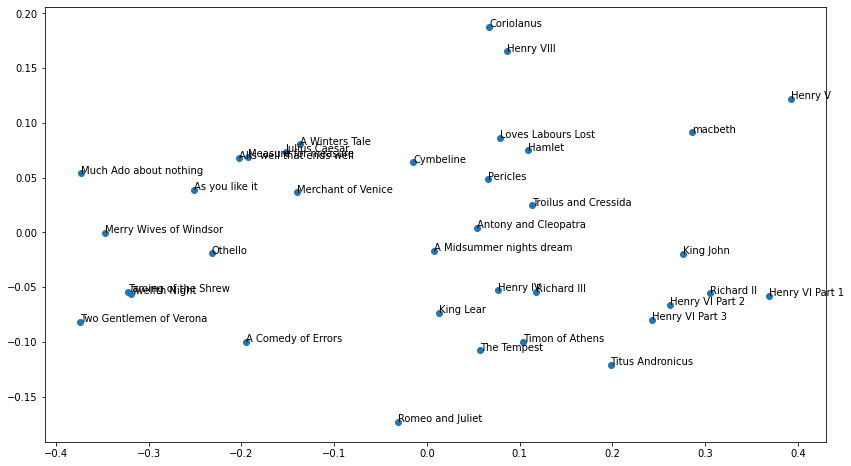

In [77]:
plt.figure(figsize=(14,8))
plt.scatter(play_vectors_pca[:, 0], play_vectors_pca[:, 1])
for i, play in enumerate(play_vectors_word2vec.keys()):
    plt.annotate(play, xy=(play_vectors_pca[i, 0], play_vectors_pca[i, 1]))
plt.savefig("play_word2vec.png")
plt.show()

In [36]:
comedies_paris = list(combinations(comedies, 2))
comedies_sim = []
for (a, b) in comedies_paris:
    v1 = play_vectors_word2vec[a]
    v2 = play_vectors_word2vec[b]
    comedies_sim.append(cos_sim(v1, v2))
print("Comedies Cosine Similarity: {}".format(np.mean(comedies_sim)))

Comedies Cosine Similarity: 0.9985671043395996


In [37]:
histories_paris = list(combinations(histories, 2))
histories_sim = []
for (a, b) in histories_paris:
    v1 = play_vectors_word2vec[a]
    v2 = play_vectors_word2vec[b]
    histories_sim.append(cos_sim(v1, v2))
print("histories Cosine Similarity: {}".format(np.mean(histories_sim)))

histories Cosine Similarity: 0.9988657832145691


In [70]:
tragedies_paris = list(combinations(tragedies, 2))
tragedies_sim = []
for (a, b) in tragedies_paris:
    v1 = play_vectors_word2vec[a]
    v2 = play_vectors_word2vec[b]
    tragedies_sim.append(cos_sim(v1, v2))
print("tragedies Cosine Similarity: {}".format(np.mean(tragedies_sim)))

tragedies Cosine Similarity: 0.998389482498169


**Task 17:**

17. Construct the vector representation of each character as the average
of all lines’ representations that the character spoke (with the trained gensim trained representation). Visualize the characters using PCA.

In [38]:
character_to_text = {}
for data in text_list[:]:
    character = data[4]
    talk = data[5]
    if character != '':
        if character not in character_to_text:
            character_to_text[character] = []
            character_to_text[character].append(talk)
        else:
            character_to_text[character].append(talk)

In [39]:
character_to_vectors = {}
for character, text in character_to_text.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    if len(word_vectors) > 3000:
        character_to_vectors[character] = np.mean(word_vectors, axis=0)

In [40]:
character_to_vectors.keys()

dict_keys(['FALSTAFF', 'PRINCE HENRY', 'HOTSPUR', 'GLOUCESTER', 'SUFFOLK', 'WARWICK', 'KING HENRY VI', 'YORK', 'QUEEN MARGARET', 'BUCKINGHAM', 'HELENA', 'Clown', 'ROSALIND', 'CLEOPATRA', 'MARK ANTONY', 'MENENIUS', 'BRUTUS', 'CORIOLANUS', 'IMOGEN', 'KING CLAUDIUS', 'HAMLET', 'KING HENRY V', 'BASTARD', 'CASSIUS', 'PORTIA', 'KING LEAR', 'BIRON', 'MACBETH', 'DUKE VINCENTIO', 'JULIET', 'ANTONIO', 'BENEDICK', 'IAGO', 'OTHELLO', 'PERICLES', 'KING RICHARD II', 'ROMEO', 'PETRUCHIO', 'PROSPERO', 'TIMON', 'TITUS ANDRONICUS', 'TROILUS', 'LEONTES'])

In [41]:
character_vectors = np.array([vector for vector in character_to_vectors.values()])

In [42]:
pca = PCA(n_components=2)
character_vectors_pca = pca.fit_transform(character_vectors)

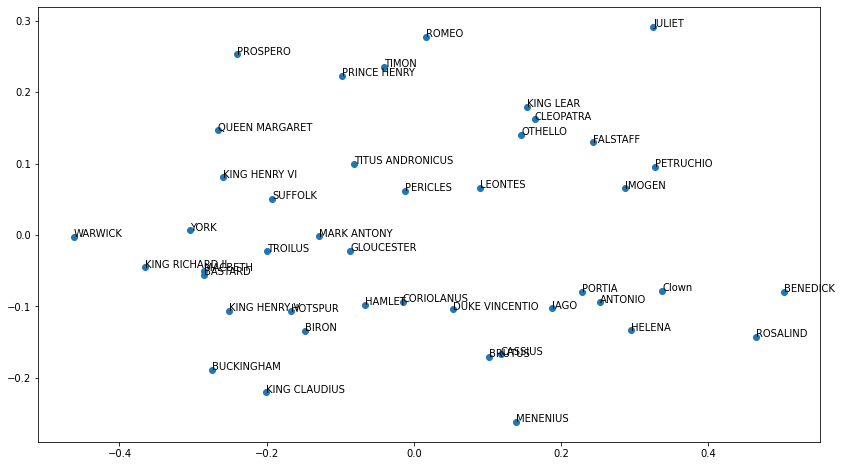

In [112]:
plt.figure(figsize=(14,8))
plt.scatter(character_vectors_pca[:, 0], character_vectors_pca[:, 1])
for i, character in enumerate(character_to_vectors.keys()):
    plt.annotate(character, xy=(character_vectors_pca[i, 0], character_vectors_pca[i, 1]))
plt.savefig("character_word2vec.png")
plt.show()

**Task 18:**

18. Can you find plays that are central i.e., closest to centroid to each genre? You could do so by visualizing the play representation with PCA.

In [45]:
play_to_text_comedies = {}
for data in text_list:
    name = data[1]
    talk = data[5]
    if name in comedies:
            if name not in play_to_text_comedies:
                play_to_text_comedies[name] = []
                play_to_text_comedies[name].append(talk)
            else:
                play_to_text_comedies[name].append(talk)

In [48]:
play_vectors_word2vec_comedies = {}
for name, text in play_to_text_comedies.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    play_vectors_word2vec_comedies[name] = np.mean(word_vectors, axis=0)

In [50]:
play_vectors_word2vec_comedies.keys()

dict_keys(['Alls well that ends well', 'As you like it', 'A Comedy of Errors', 'Loves Labours Lost', 'Measure for measure', 'Merchant of Venice', 'Merry Wives of Windsor', 'A Midsummer nights dream', 'Much Ado about nothing', 'Pericles', 'Taming of the Shrew', 'The Tempest', 'Twelfth Night', 'Two Gentlemen of Verona', 'A Winters Tale'])

In [51]:
comedies_vectors = np.array([vector for vector in play_vectors_word2vec_comedies.values()])

In [52]:
pca = PCA(n_components=2)
comedies_vectors_pca = pca.fit_transform(comedies_vectors)

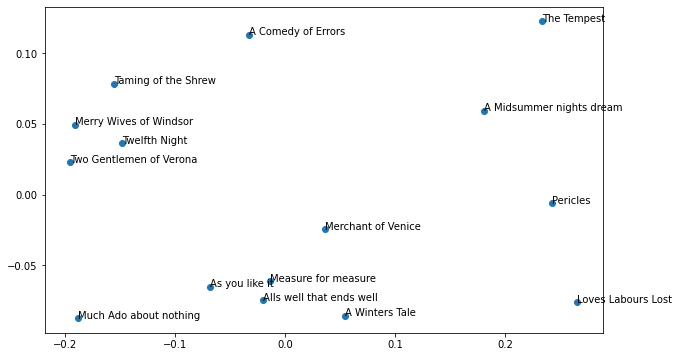

In [110]:
plt.figure(figsize=(10,6))
plt.scatter(comedies_vectors_pca[:, 0], comedies_vectors_pca[:, 1])
for i, comedies in enumerate(play_vectors_word2vec_comedies.keys()):
    plt.annotate(comedies, xy=(comedies_vectors_pca[i, 0], comedies_vectors_pca[i, 1]))
plt.savefig("comedies_word2vec.png")
plt.show()

In [93]:
play_to_text_histories = {}
for data in text_list:
    name = data[1]
    talk = data[5]
    if name in histories:
            if name not in play_to_text_histories:
                play_to_text_histories[name] = []
                play_to_text_histories[name].append(talk)
            else:
                play_to_text_histories[name].append(talk)

play_vectors_word2vec_histories = {}
for name, text in play_to_text_histories.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    play_vectors_word2vec_histories[name] = np.mean(word_vectors, axis=0)

play_vectors_word2vec_histories.keys()

dict_keys(['Henry IV', 'Henry VI Part 1', 'Henry VI Part 2', 'Henry VI Part 3', 'Henry V', 'Henry VIII', 'King John', 'Richard II', 'Richard III'])

In [94]:
histories_vectors = np.array([vector for vector in play_vectors_word2vec_histories.values()])
pca = PCA(n_components=2)
histories_vectors_pca = pca.fit_transform(histories_vectors)

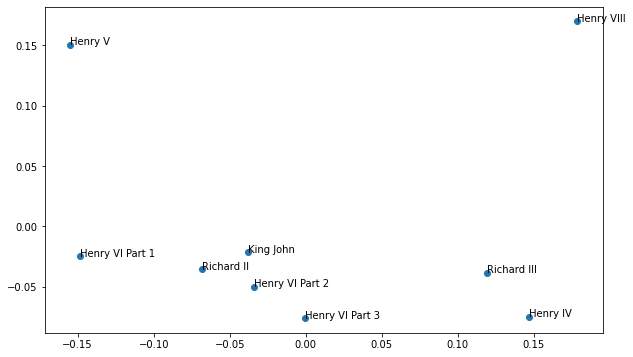

In [109]:
plt.figure(figsize=(10,6))
plt.scatter(histories_vectors_pca[:, 0], histories_vectors_pca[:, 1])
for i, histories in enumerate(play_vectors_word2vec_histories.keys()):
    plt.annotate(histories, xy=(histories_vectors_pca[i, 0], histories_vectors_pca[i, 1]))
plt.savefig("histories_word2vec.png")
plt.show()

In [96]:
play_to_text_tragedies = {}
for data in text_list:
    name = data[1]
    talk = data[5]
    if name in tragedies:
            if name not in play_to_text_tragedies:
                play_to_text_tragedies[name] = []
                play_to_text_tragedies[name].append(talk)
            else:
                play_to_text_tragedies[name].append(talk)

play_vectors_word2vec_tragedies = {}
for name, text in play_to_text_tragedies.items():
    word_vectors = []
    text = ' '.join(text)
    for word in text.lower().split():
        if word in model.wv.vocab:
            word_vectors.append(model.wv[word])
    play_vectors_word2vec_tragedies[name] = np.mean(word_vectors, axis=0)

play_vectors_word2vec_tragedies.keys()

dict_keys(['Antony and Cleopatra', 'Coriolanus', 'Cymbeline', 'Hamlet', 'Julius Caesar', 'King Lear', 'macbeth', 'Othello', 'Romeo and Juliet', 'Timon of Athens', 'Titus Andronicus', 'Troilus and Cressida'])

In [97]:
tragedies_vectors = np.array([vector for vector in play_vectors_word2vec_tragedies.values()])
pca = PCA(n_components=2)
tragedies_vectors_pca = pca.fit_transform(tragedies_vectors)

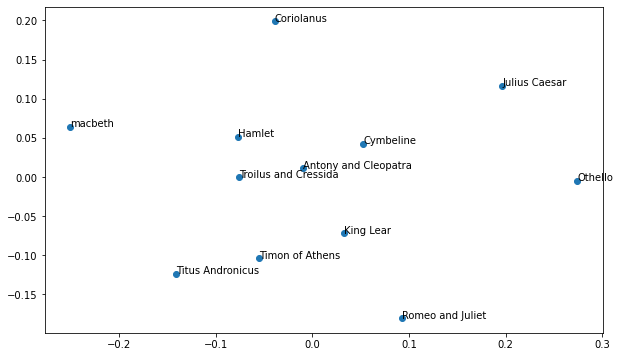

In [108]:
plt.figure(figsize=(10,6))
plt.scatter(tragedies_vectors_pca[:, 0], tragedies_vectors_pca[:, 1])
for i, tragedies in enumerate(play_vectors_word2vec_tragedies.keys()):
    plt.annotate(tragedies, xy=(tragedies_vectors_pca[i, 0], tragedies_vectors_pca[i, 1]))
plt.savefig("tragedies_word2vec.png")
plt.show()